In [ ]:
import pandas as pd

file_path = "household_power_consumption.txt"

df = pd.read_csv(file_path, sep=";", na_values="?", low_memory=False)

print(df.head(10))

         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   
5  16/12/2006  17:29:00                3.520                  0.522   235.02   
6  16/12/2006  17:30:00                3.702                  0.520   235.09   
7  16/12/2006  17:31:00                3.700                  0.520   235.22   
8  16/12/2006  17:32:00                3.668                  0.510   233.99   
9  16/12/2006  17:33:00                3.662                  0.510   233.86   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1

Ativa (Global_active_power) = energia realmente consumida/utilizada.

Reativa (Global_reactive_power) = energia “vai e volta” no sistema, necessária para manter campos elétricos/magnéticos, mas não gera trabalho direto.

In [ ]:
import pandas as pd

file_path = "household_power_consumption.txt"

df = pd.read_csv(file_path, sep=";", na_values="?", low_memory=False)

missing_per_column = df.isnull().sum()

total_missing = df.isnull().sum().sum()

print("Valores ausentes por coluna:")
print(missing_per_column)
print("\nTotal de valores ausentes no dataset:", total_missing)

Valores ausentes por coluna:
Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

Total de valores ausentes no dataset: 181853


In [ ]:
import pandas as pd

file_path = "household_power_consumption.txt"

df = pd.read_csv(file_path, sep=";", na_values="?", low_memory=False)
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df["Weekday"] = df["Date"].dt.day_name()

print(df[["Date", "Weekday"]].head(10))

        Date   Weekday
0 2006-12-16  Saturday
1 2006-12-16  Saturday
2 2006-12-16  Saturday
3 2006-12-16  Saturday
4 2006-12-16  Saturday
5 2006-12-16  Saturday
6 2006-12-16  Saturday
7 2006-12-16  Saturday
8 2006-12-16  Saturday
9 2006-12-16  Saturday


In [ ]:
import pandas as pd

file_path = "household_power_consumption.txt"

df = pd.read_csv(file_path, sep=";", na_values="?", low_memory=False)
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df_2007 = df[df["Date"].dt.year == 2007]

daily_mean_2007 = df_2007.groupby(df_2007["Date"].dt.date)["Global_active_power"].mean()

print(daily_mean_2007.head(10))
print("\nMédia geral de consumo diário em 2007:", daily_mean_2007.mean())

Date
2007-01-01    1.909031
2007-01-02    0.881414
2007-01-03    0.704204
2007-01-04    2.263481
2007-01-05    1.884281
2007-01-06    1.047485
2007-01-07    1.699736
2007-01-08    1.556500
2007-01-09    1.297954
2007-01-10    1.496389
Name: Global_active_power, dtype: float64

Média geral de consumo diário em 2007: 1.116143014214133


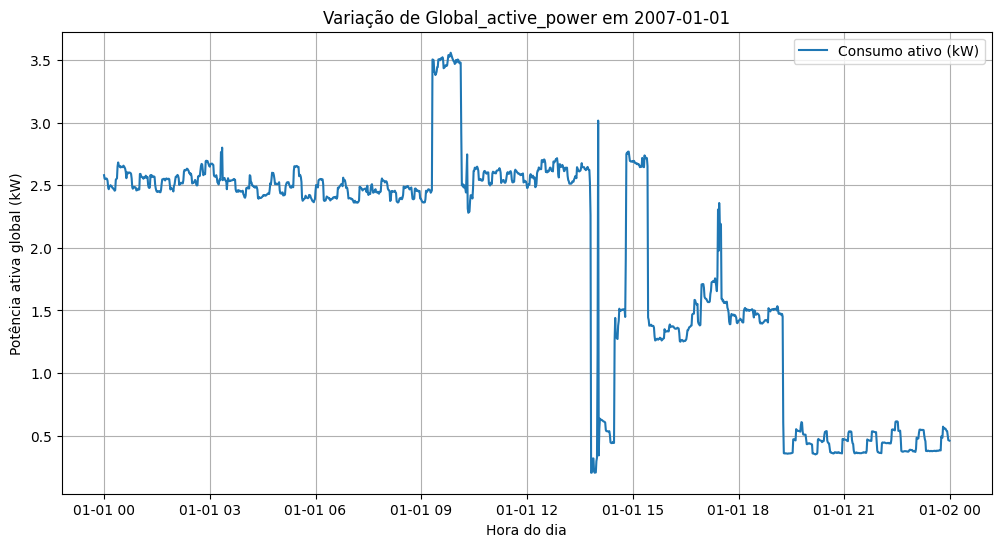

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "household_power_consumption.txt"

df = pd.read_csv(file_path, sep=";", na_values="?", low_memory=False)

df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df["DateTime"] = pd.to_datetime(df["Date"].astype(str) + " " + df["Time"])

one_day = df[df["Date"] == "2007-01-01"]

plt.figure(figsize=(12,6))
plt.plot(one_day["DateTime"], one_day["Global_active_power"], label="Consumo ativo (kW)")
plt.title("Variação de Global_active_power em 2007-01-01")
plt.xlabel("Hora do dia")
plt.ylabel("Potência ativa global (kW)")
plt.legend()
plt.grid(True)
plt.show()

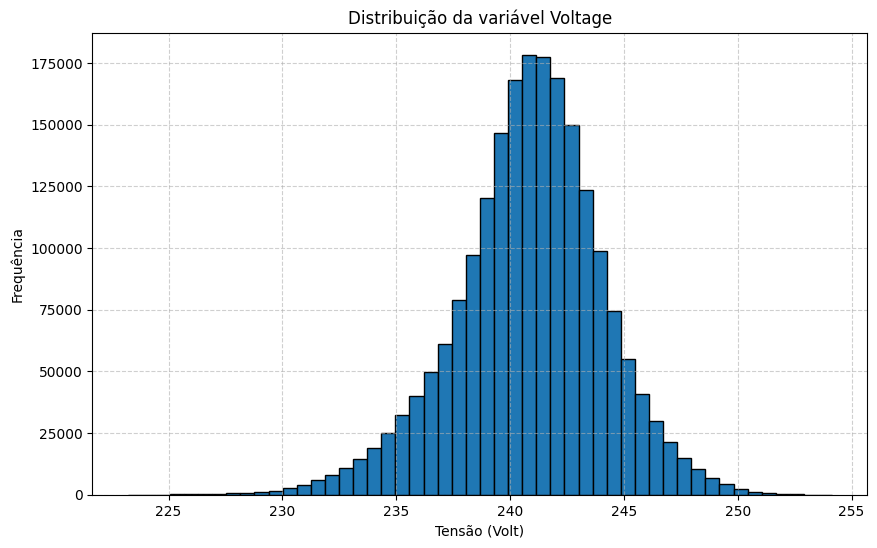

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "household_power_consumption.txt"

df = pd.read_csv(file_path, sep=";", na_values="?", low_memory=False)
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

plt.figure(figsize=(10,6))
plt.hist(df["Voltage"].dropna(), bins=50, edgecolor="black")
plt.title("Distribuição da variável Voltage")
plt.xlabel("Tensão (Volt)")
plt.ylabel("Frequência")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [ ]:
import pandas as pd

file_path = "household_power_consumption.txt"

df = pd.read_csv(file_path, sep=";", na_values="?", low_memory=False)
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df["YearMonth"] = df["Date"].dt.to_period("M")

monthly_mean = df.groupby("YearMonth")["Global_active_power"].mean()

print(monthly_mean.head(12))
print("\nMédia geral mensal em todo o período:", monthly_mean.mean())

YearMonth
2006-12    1.901295
2007-01    1.546034
2007-02    1.401084
2007-03    1.318627
2007-04    0.891189
2007-05    0.985862
2007-06    0.826814
2007-07    0.667367
2007-08    0.764186
2007-09    0.969318
2007-10    1.103911
2007-11    1.294473
Freq: M, Name: Global_active_power, dtype: float64

Média geral mensal em todo o período: 1.0992672086976258


In [ ]:
import pandas as pd

file_path = "household_power_consumption.txt"

df = pd.read_csv(file_path, sep=";", na_values="?", low_memory=False)
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

daily_consumption = df.groupby(df["Date"].dt.date)["Global_active_power"].sum()

max_day = daily_consumption.idxmax()
max_value = daily_consumption.max()

print(f"O dia com maior consumo de energia ativa global foi {max_day} com {max_value:.2f} kW")

O dia com maior consumo de energia ativa global foi 2006-12-23 com 4773.39 kW


In [ ]:
import pandas as pd

file_path = "household_power_consumption.txt"

df = pd.read_csv(file_path, sep=";", na_values="?", low_memory=False)
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df["Weekday"] = df["Date"].dt.day_name()
df["Day_Type"] = df["Weekday"].apply(lambda x: "Weekend" if x in ["Saturday", "Sunday"] else "Weekday")

mean_by_day_type = df.groupby("Day_Type")["Global_active_power"].mean()

print(mean_by_day_type)

Day_Type
Weekday    1.035472
Weekend    1.234232
Name: Global_active_power, dtype: float64


In [ ]:
import pandas as pd

file_path = "household_power_consumption.txt"

df = pd.read_csv(file_path, sep=";", na_values="?", low_memory=False)

# Selecionar apenas as colunas de interesse e converter para float
cols = ["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity"]
df[cols] = df[cols].astype(float)

# Calcular a correlação
correlation_matrix = df[cols].corr()

print(correlation_matrix)

                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   

                       Global_intensity  
Global_active_power            0.998889  
Global_reactive_power          0.266120  
Voltage                       -0.411363  
Global_intensity               1.000000  


In [ ]:
import pandas as pd

file_path = "household_power_consumption.txt"

df = pd.read_csv(file_path, sep=";", na_values="?", low_memory=False)

sub_cols = ["Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]
df[sub_cols] = df[sub_cols].astype(float)
df["Total_Sub_metering"] = df["Sub_metering_1"] + df["Sub_metering_2"] + df["Sub_metering_3"]

print(df[["Sub_metering_1", "Sub_metering_2", "Sub_metering_3", "Total_Sub_metering"]].head(10))

   Sub_metering_1  Sub_metering_2  Sub_metering_3  Total_Sub_metering
0             0.0             1.0            17.0                18.0
1             0.0             1.0            16.0                17.0
2             0.0             2.0            17.0                19.0
3             0.0             1.0            17.0                18.0
4             0.0             1.0            17.0                18.0
5             0.0             2.0            17.0                19.0
6             0.0             1.0            17.0                18.0
7             0.0             1.0            17.0                18.0
8             0.0             1.0            17.0                18.0
9             0.0             2.0            16.0                18.0


In [ ]:
import pandas as pd

file_path = "household_power_consumption.txt"

df = pd.read_csv(file_path, sep=";", na_values="?", low_memory=False)

df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
sub_cols = ["Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]
df[sub_cols] = df[sub_cols].astype(float)
df["Total_Sub_metering"] = df[sub_cols].sum(axis=1)
df["Global_active_power"] = df["Global_active_power"].astype(float)
df["YearMonth"] = df["Date"].dt.to_period("M")

monthly_sub_metering = df.groupby("YearMonth")["Total_Sub_metering"].sum()

global_active_mean = df["Global_active_power"].mean()

months_exceeding = monthly_sub_metering[monthly_sub_metering > global_active_mean]

print("Meses em que Total_Sub_metering ultrapassa a média de Global_active_power:")
print(months_exceeding)

Meses em que Total_Sub_metering ultrapassa a média de Global_active_power:
YearMonth
2006-12    239123.0
2007-01    465285.0
2007-02    382462.0
2007-03    455892.0
2007-04    269998.0
2007-05    377317.0
2007-06    318462.0
2007-07    253600.0
2007-08    311404.0
2007-09    354493.0
2007-10    387212.0
2007-11    424179.0
2007-12    519444.0
2008-01    436847.0
2008-02    352756.0
2008-03    422057.0
2008-04    413629.0
2008-05    402611.0
2008-06    422280.0
2008-07    318957.0
2008-08    105802.0
2008-09    381248.0
2008-10    383208.0
2008-11    394569.0
2008-12    391912.0
2009-01    477209.0
2009-02    393948.0
2009-03    441769.0
2009-04    414947.0
2009-05    404717.0
2009-06    321132.0
2009-07    248690.0
2009-08    264304.0
2009-09    394293.0
2009-10    435962.0
2009-11    449447.0
2009-12    495200.0
2010-01    506368.0
2010-02    514572.0
2010-03    420313.0
2010-04    410763.0
2010-05    465108.0
2010-06    420356.0
2010-07    244938.0
2010-08    199671.0
2010-09    3272

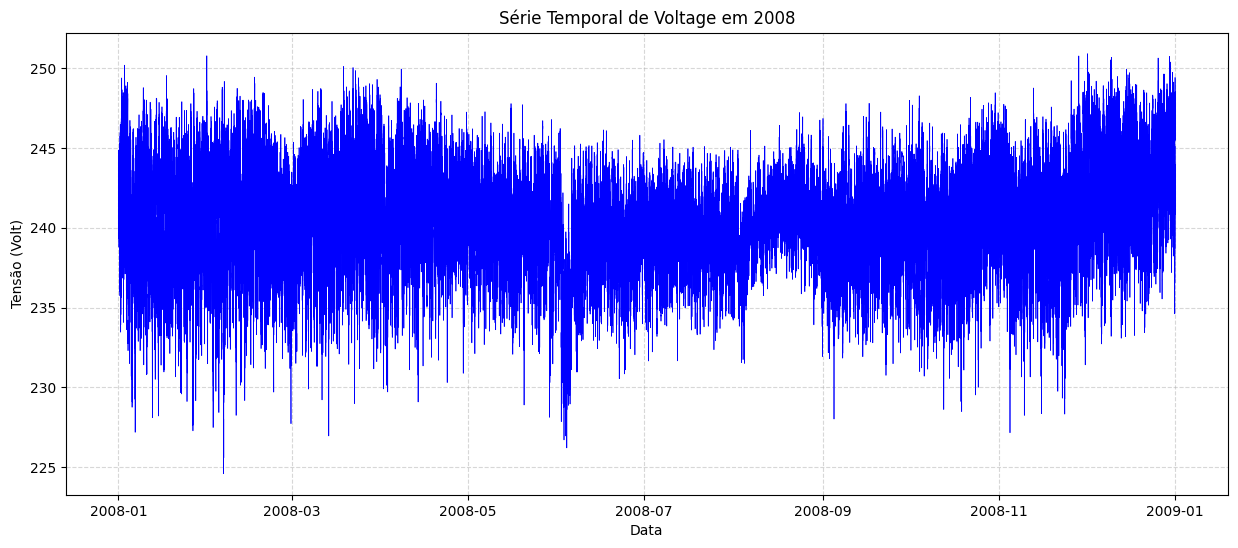

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "household_power_consumption.txt"

df = pd.read_csv(file_path, sep=";", na_values="?", low_memory=False)

df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df["DateTime"] = pd.to_datetime(df["Date"].astype(str) + " " + df["Time"])
df["Voltage"] = df["Voltage"].astype(float)
df_2008 = df[df["Date"].dt.year == 2008]

plt.figure(figsize=(15,6))
plt.plot(df_2008["DateTime"], df_2008["Voltage"], color="blue", linewidth=0.5)
plt.title("Série Temporal de Voltage em 2008")
plt.xlabel("Data")
plt.ylabel("Tensão (Volt)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [ ]:
import pandas as pd

file_path = "household_power_consumption.txt"

df = pd.read_csv(file_path, sep=";", na_values="?", low_memory=False)
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df["Global_active_power"] = df["Global_active_power"].astype(float)
df["Month"] = df["Date"].dt.month

def season(month):
    if month in [6,7,8]:
        return "Summer"
    elif month in [12,1,2]:
        return "Winter"
    else:
        return "Other"

df["Season"] = df["Month"].apply(season)

mean_by_season = df[df["Season"].isin(["Summer","Winter"])].groupby("Season")["Global_active_power"].mean()

print(mean_by_season)

Season
Summer    0.726682
Winter    1.417623
Name: Global_active_power, dtype: float64


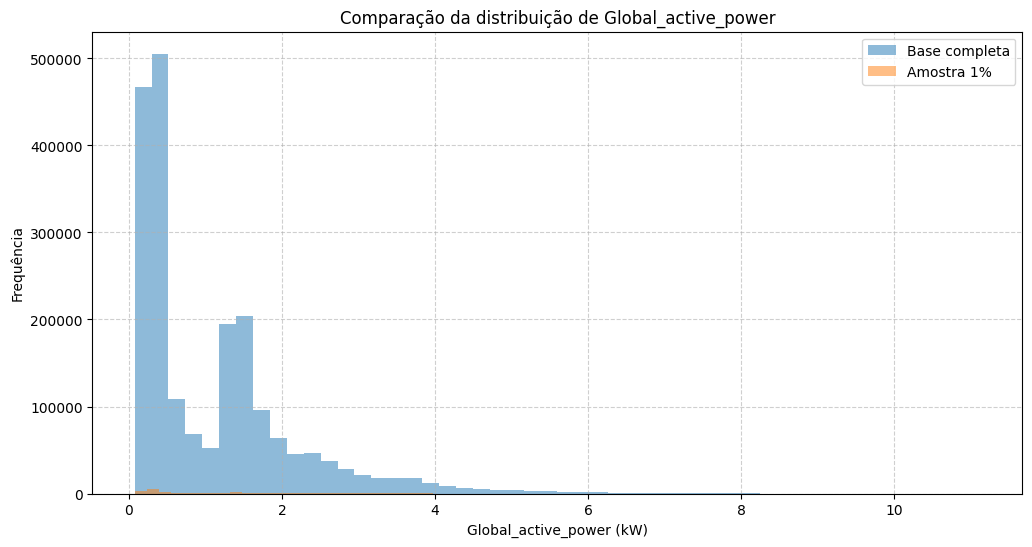

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "household_power_consumption.txt"

df = pd.read_csv(file_path, sep=";", na_values="?", low_memory=False)
df["Global_active_power"] = df["Global_active_power"].astype(float)

sample_df = df.sample(frac=0.01, random_state=42)

plt.figure(figsize=(12,6))
plt.hist(df["Global_active_power"].dropna(), bins=50, alpha=0.5, label="Base completa")
plt.hist(sample_df["Global_active_power"].dropna(), bins=50, alpha=0.5, label="Amostra 1%")
plt.title("Comparação da distribuição de Global_active_power")
plt.xlabel("Global_active_power (kW)")
plt.ylabel("Frequência")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

file_path = "household_power_consumption.txt"

df = pd.read_csv(file_path, sep=";", na_values="?", low_memory=False)

num_cols = ["Global_active_power", "Global_reactive_power", "Voltage",
            "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]
df[num_cols] = df[num_cols].astype(float)

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

print(df_scaled[num_cols].head(10))

   Global_active_power  Global_reactive_power   Voltage  Global_intensity  \
0             0.374796               0.300719  0.376090          0.377593   
1             0.478363               0.313669  0.336995          0.473029   
2             0.479631               0.358273  0.326010          0.473029   
3             0.480898               0.361151  0.340549          0.473029   
4             0.325005               0.379856  0.403231          0.323651   
5             0.311787               0.375540  0.381906          0.307054   
6             0.328264               0.374101  0.384168          0.323651   
7             0.328083               0.374101  0.388368          0.323651   
8             0.325186               0.366906  0.348627          0.323651   
9             0.324642               0.366906  0.344426          0.323651   

   Sub_metering_1  Sub_metering_2  Sub_metering_3  
0             0.0          0.0125        0.548387  
1             0.0          0.0125        0.51612

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

file_path = "household_power_consumption.txt"

df = pd.read_csv(file_path, sep=";", na_values="?", low_memory=False)
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df["Global_active_power"] = df["Global_active_power"].astype(float)

daily_consumption = df.groupby(df["Date"].dt.date)["Global_active_power"].mean().reset_index()
daily_consumption.rename(columns={"Global_active_power": "Avg_Global_active_power"}, inplace=True)

daily_consumption.dropna(inplace=True)

scaler = MinMaxScaler()
daily_consumption["Avg_Global_active_power_scaled"] = scaler.fit_transform(daily_consumption[["Avg_Global_active_power"]])

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
daily_consumption["Cluster"] = kmeans.fit_predict(daily_consumption[["Avg_Global_active_power_scaled"]])

print(daily_consumption.head(10))
print("\nMédia de consumo por cluster:")
print(daily_consumption.groupby("Cluster")["Avg_Global_active_power"].mean())

         Date  Avg_Global_active_power  Avg_Global_active_power_scaled  \
0  2006-12-16                 3.053475                        0.916786   
1  2006-12-17                 2.354486                        0.694252   
2  2006-12-18                 1.530435                        0.431901   
3  2006-12-19                 1.157079                        0.313037   
4  2006-12-20                 1.545658                        0.436748   
5  2006-12-21                 1.193758                        0.324715   
6  2006-12-22                 1.625929                        0.462304   
7  2006-12-23                 3.314851                        1.000000   
8  2006-12-24                 1.770842                        0.508439   
9  2006-12-25                 1.904944                        0.551133   

   Cluster  
0        2  
1        2  
2        2  
3        0  
4        2  
5        0  
6        2  
7        2  
8        2  
9        2  

Média de consumo por cluster:
Cluster
0  

/tmp/ipython-input-1049866034.py:8: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["DateTime"] = pd.to_datetime(df["Date"] + " " + df["Time"])
/tmp/ipython-input-1049866034.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6months.dropna(subset=["Global_active_power"], inplace=True)


<Figure size 1200x1000 with 0 Axes>

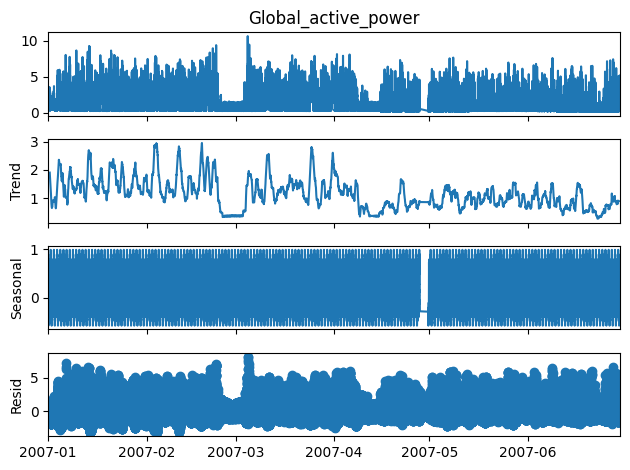

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

file_path = "household_power_consumption.txt"

df = pd.read_csv(file_path, sep=";", na_values="?", low_memory=False)
df["DateTime"] = pd.to_datetime(df["Date"] + " " + df["Time"])
df["Global_active_power"] = df["Global_active_power"].astype(float)

df_6months = df[(df["DateTime"] >= "2007-01-01") & (df["DateTime"] <= "2007-06-30")]
df_6months.set_index("DateTime", inplace=True)

# Drop rows with missing values in 'Global_active_power' before decomposition
df_6months.dropna(subset=["Global_active_power"], inplace=True)


decomposition = seasonal_decompose(df_6months["Global_active_power"], model="additive", period=1440)

plt.figure(figsize=(12,10))
decomposition.plot()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

file_path = "household_power_consumption.txt"

df = pd.read_csv(file_path, sep=";", na_values="?", low_memory=False)
df["Global_active_power"] = df["Global_active_power"].astype(float)
df["Global_intensity"] = df["Global_intensity"].astype(float)
df_model = df[["Global_active_power", "Global_intensity"]].dropna()

X = df_model[["Global_intensity"]]
y = df_model["Global_active_power"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Coeficiente angular (slope): {model.coef_[0]:.4f}")
print(f"Coeficiente linear (intercept): {model.intercept_:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² score: {r2:.4f}")

Coeficiente angular (slope): 0.2376
Coeficiente linear (intercept): -0.0081
Mean Squared Error (MSE): 0.0025
R² score: 0.9978


In [ ]:
import pandas as pd

file_path = "household_power_consumption.txt"

df = pd.read_csv(file_path, sep=";", na_values="?", low_memory=False)
df["DateTime"] = pd.to_datetime(df["Date"] + " " + df["Time"])
df["Global_active_power"] = df["Global_active_power"].astype(float)
df.set_index("DateTime", inplace=True)
df_hourly = df["Global_active_power"].resample("1H").mean()

hourly_pattern = df_hourly.groupby(df_hourly.index.hour).mean()

print("Média de consumo por hora do dia (kW):")
print(hourly_pattern)
print("\nHorários de maior consumo médio:")
print(hourly_pattern.sort_values(ascending=False).head())

Média de consumo por hora do dia (kW):
DateTime
0     0.812750
1     0.644031
2     0.533523
3     0.484206
4     0.468968
5     0.497310
6     0.821438
7     1.421189
8     1.482398
9     1.347906
10    1.237711
11    1.128268
12    1.046544
13    0.992182
14    0.997618
15    0.951621
16    0.933056
17    1.030894
18    1.409336
19    1.878842
20    1.868047
21    1.953110
22    1.568800
23    1.083965
Name: Global_active_power, dtype: float64

Horários de maior consumo médio:
DateTime
21    1.953110
19    1.878842
20    1.868047
22    1.568800
8     1.482398
Name: Global_active_power, dtype: float64


/tmp/ipython-input-1197223329.py:6: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["DateTime"] = pd.to_datetime(df["Date"] + " " + df["Time"])
/tmp/ipython-input-1197223329.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df["Global_active_power"].resample("1H").mean()


In [ ]:
import pandas as pd

file_path = "household_power_consumption.txt"

df = pd.read_csv(file_path, sep=";", na_values="?", low_memory=False)
df["DateTime"] = pd.to_datetime(df["Date"] + " " + df["Time"])
df["Global_active_power"] = df["Global_active_power"].astype(float)
df.set_index("DateTime", inplace=True)
df_hourly = df["Global_active_power"].resample("1H").mean()

autocorr_1h = df_hourly.autocorr(lag=1)
autocorr_24h = df_hourly.autocorr(lag=24)
autocorr_48h = df_hourly.autocorr(lag=48)

print(f"Autocorrelação (lag=1h): {autocorr_1h:.4f}")
print(f"Autocorrelação (lag=24h): {autocorr_24h:.4f}")
print(f"Autocorrelação (lag=48h): {autocorr_48h:.4f}")

Autocorrelação (lag=1h): 0.7256
Autocorrelação (lag=24h): 0.4332
Autocorrelação (lag=48h): 0.3916


/tmp/ipython-input-3758216936.py:6: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["DateTime"] = pd.to_datetime(df["Date"] + " " + df["Time"])
/tmp/ipython-input-3758216936.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df["Global_active_power"].resample("1H").mean()


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

file_path = "household_power_consumption.txt"

df = pd.read_csv(file_path, sep=";", na_values="?", low_memory=False)

cols = ["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity"]
df[cols] = df[cols].astype(float)
df_pca = df[cols].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_

print("Variância explicada por cada componente:")
for i, var in enumerate(explained_variance, 1):
    print(f"Componente {i}: {var:.4f}")

print(f"\nVariância total explicada pelos 2 componentes: {explained_variance.sum():.4f}")

Variância explicada por cada componente:
Componente 1: 0.5910
Componente 2: 0.2272

Variância total explicada pelos 2 componentes: 0.8182


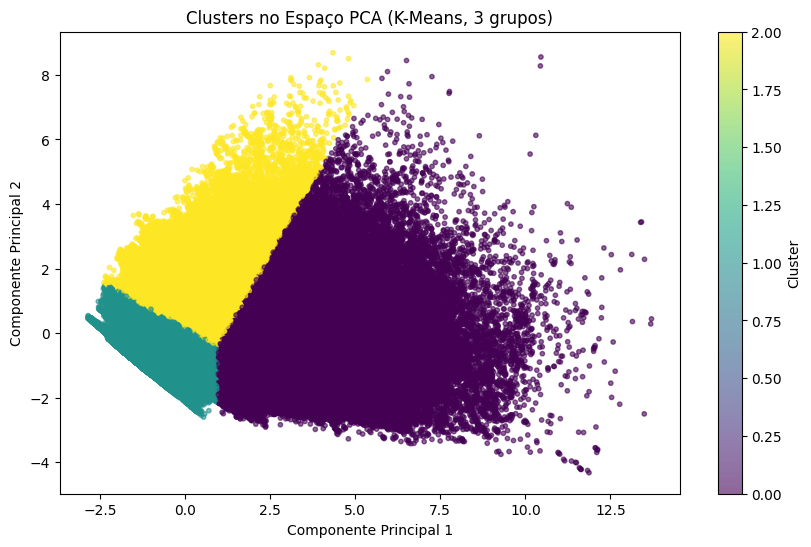

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

file_path = "household_power_consumption.txt"

df = pd.read_csv(file_path, sep=";", na_values="?", low_memory=False)

cols = ["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity"]
df[cols] = df[cols].astype(float)
df_pca = df[cols].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap="viridis", s=10, alpha=0.6)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Clusters no Espaço PCA (K-Means, 3 grupos)")
plt.colorbar(label="Cluster")
plt.show()

In [ ]:
import pandas as pd

file_path = "energydata_complete.csv"

df = pd.read_csv(file_path)

print("Primeiras linhas do dataset:")
print(df.head())
print("\nInformações do dataset:")
print(df.info())
print("\nEstatísticas descritivas:")
print(df.describe())

Primeiras linhas do dataset:
                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   

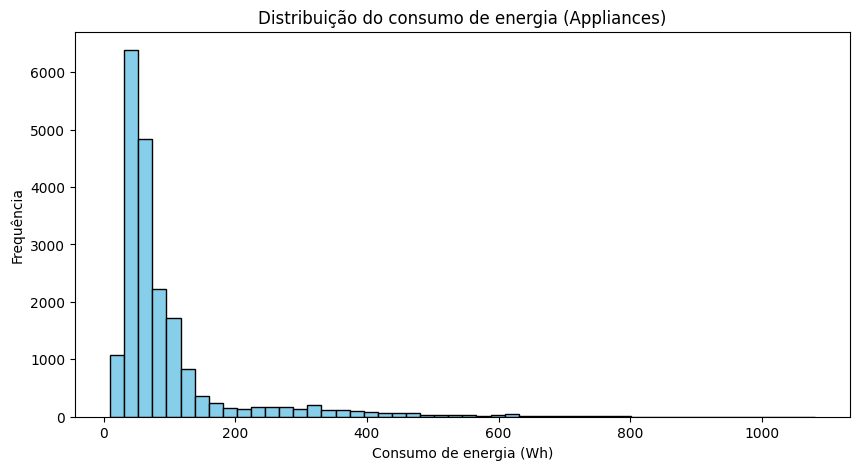

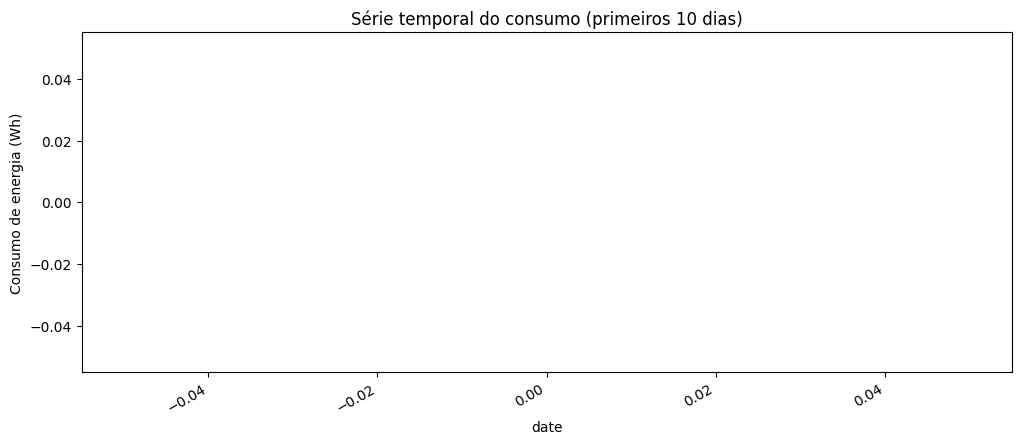

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "energydata_complete.csv"
df = pd.read_csv(file_path)
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)

plt.figure(figsize=(10,5))
plt.hist(df["Appliances"], bins=50, color="skyblue", edgecolor="black")
plt.xlabel("Consumo de energia (Wh)")
plt.ylabel("Frequência")
plt.title("Distribuição do consumo de energia (Appliances)")
plt.show()
plt.figure(figsize=(12,5))
df["Appliances"].loc["2016-01-01":"2016-01-10"].plot()
plt.ylabel("Consumo de energia (Wh)")
plt.title("Série temporal do consumo (primeiros 10 dias)")
plt.show()

Correlação de 'Appliances' com variáveis ambientais:
Appliances    1.000000
T2            0.120073
T6            0.117638
T_out         0.099155
RH_1          0.086031
T3            0.085060
T1            0.055447
T4            0.040281
T8            0.039572
RH_3          0.036292
T7            0.025801
T5            0.019760
RH_4          0.016965
Tdewpoint     0.015353
T9            0.010010
RH_5          0.006955
RH_9         -0.051462
RH_7         -0.055642
RH_2         -0.060465
RH_6         -0.083178
RH_8         -0.094039
RH_out       -0.152282
Name: Appliances, dtype: float64


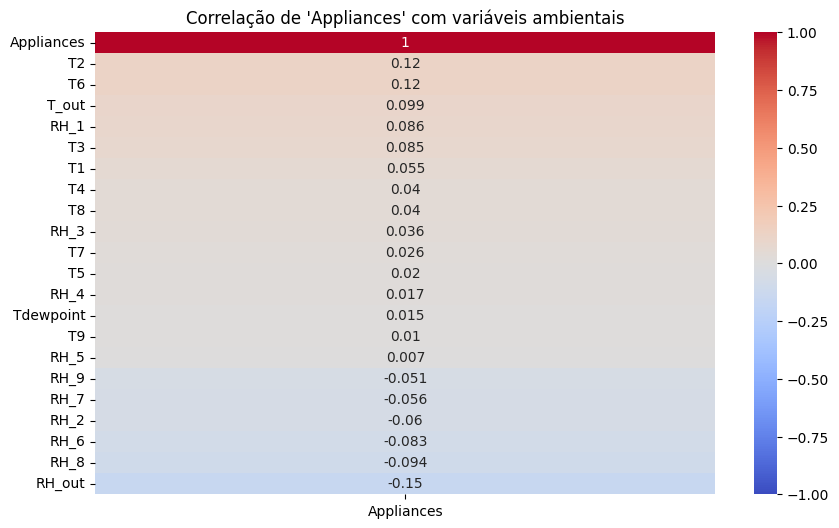

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "energydata_complete.csv"
df = pd.read_csv(file_path)

temp_humidity_cols = [col for col in df.columns if col.startswith("T") or col.startswith("RH")]
features = ["Appliances"] + temp_humidity_cols
df_corr = df[features]

corr = df_corr.corr()

appliances_corr = corr["Appliances"].sort_values(ascending=False)

print("Correlação de 'Appliances' com variáveis ambientais:")
print(appliances_corr)

plt.figure(figsize=(10,6))
sns.heatmap(corr[["Appliances"]].sort_values(by="Appliances", ascending=False), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlação de 'Appliances' com variáveis ambientais")
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

file_path = "energydata_complete.csv"
df = pd.read_csv(file_path)

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Primeiras linhas após normalização:")
print(df_scaled.head())
print("\nEstatísticas após normalização (esperado: min ~0, max ~1):")
print(df_scaled[numeric_cols].describe().loc[["min", "max"]])

Primeiras linhas após normalização:
                  date  Appliances    lights       T1      RH_1        T2  \
0  2016-01-11 17:00:00    0.046729  0.428571  0.32735  0.566187  0.225345   
1  2016-01-11 17:10:00    0.046729  0.428571  0.32735  0.541326  0.225345   
2  2016-01-11 17:20:00    0.037383  0.428571  0.32735  0.530502  0.225345   
3  2016-01-11 17:30:00    0.037383  0.571429  0.32735  0.524080  0.225345   
4  2016-01-11 17:40:00    0.046729  0.571429  0.32735  0.531419  0.225345   

       RH_2        T3      RH_3        T4  ...        T9      RH_9     T_out  \
0  0.684038  0.215188  0.746066  0.351351  ...  0.223032  0.677290  0.372990   
1  0.682140  0.215188  0.748871  0.351351  ...  0.226500  0.678532  0.369239   
2  0.679445  0.215188  0.755569  0.344745  ...  0.219563  0.676049  0.365488   
3  0.678414  0.215188  0.758685  0.341441  ...  0.219563  0.671909  0.361736   
4  0.676727  0.215188  0.758685  0.341441  ...  0.219563  0.671909  0.357985   

   Press_mm_hg    RH

Variância explicada pelos 2 componentes: 0.5854


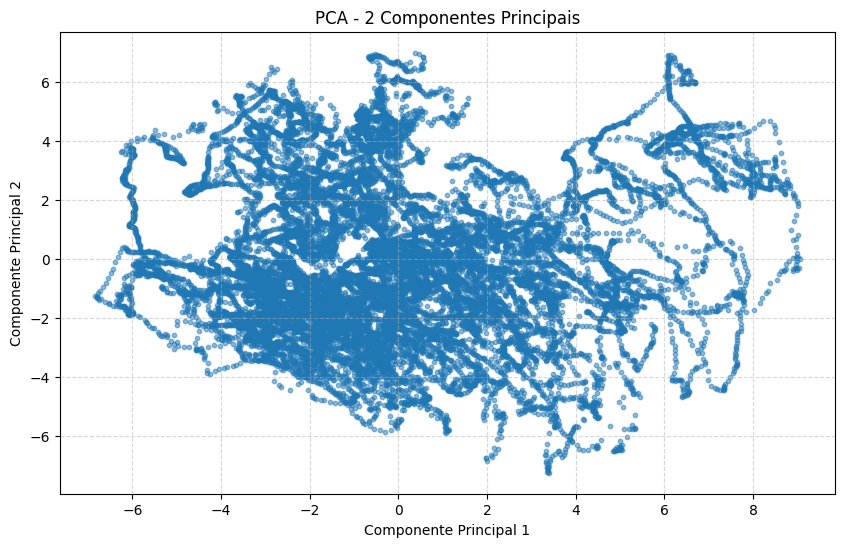

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

file_path = "energydata_complete.csv"
df = pd.read_csv(file_path)

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
df_numeric = df[numeric_cols].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
print(f"Variância explicada pelos 2 componentes: {explained_variance.sum():.4f}")

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5, s=10)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA - 2 Componentes Principais")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

file_path = "energydata_complete.csv"
df = pd.read_csv(file_path)

feature_cols = [col for col in df.columns if col.startswith("T") or col.startswith("RH") or col == "T_out"]
X = df[feature_cols].astype(float)
y = df["Appliances"].astype(float)

X = X.dropna()
y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"R² score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R² score: 0.1440
RMSE: 92.5516


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

file_path = "energydata_complete.csv"
df = pd.read_csv(file_path)

feature_cols = [col for col in df.columns if col.startswith("T") or col.startswith("RH") or col == "T_out"]
X = df[feature_cols].astype(float)
y = df["Appliances"].astype(float)

X = X.dropna()
y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"RMSE - Random Forest: {rmse_rf:.4f}")

RMSE - Random Forest: 63.3219


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

file_path = "energydata_complete.csv"
df = pd.read_csv(file_path)

feature_cols = ["Appliances", "T_out", "RH_out"]
X = df[feature_cols].astype(float)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k_values = [3, 4, 5]
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    df[f"Cluster_{k}"] = clusters

    cluster_means = df.groupby(f"Cluster_{k}")[feature_cols].mean()
    print(f"\nK-Means com {k} clusters - médias por cluster:")
    print(cluster_means)


K-Means com 3 clusters - médias por cluster:
           Appliances      T_out     RH_out
Cluster_3                                  
0           66.044155   5.143046  87.789061
1           87.990917  12.595151  61.980013
2          401.471372   7.637957  76.761226

K-Means com 4 clusters - médias por cluster:
           Appliances      T_out     RH_out
Cluster_4                                  
0           64.054238   2.684071  90.281957
1           94.026393  14.261268  55.848623
2          400.773333   7.553841  76.845463
3           71.616135   8.896995  80.896688

K-Means com 5 clusters - médias por cluster:
           Appliances      T_out     RH_out
Cluster_5                                  
0           61.868010   2.672709  90.258687
1           92.487355  14.317730  55.744760
2          570.407240   9.624460  71.186149
3           68.410207   8.941212  80.955217
4          305.378398   6.622826  79.403808


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

file_path = "energydata_complete.csv"
df = pd.read_csv(file_path)

feature_cols = [col for col in df.columns if col.startswith("T") or col.startswith("RH") or col == "T_out"]
X = df[feature_cols].astype(float)
y = df["Appliances"].astype(float)

median_val = y.median()
y_bin = (y > median_val).astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_bin, test_size=0.2, random_state=42)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression:")
print(f"Accuracy: {acc_log:.4f}")
print(classification_report(y_test, y_pred_log))

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Classifier:")
print(f"Accuracy: {acc_rf:.4f}")
print(classification_report(y_test, y_pred_rf))

Logistic Regression:
Accuracy: 0.7504
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      2127
           1       0.74      0.71      0.72      1820

    accuracy                           0.75      3947
   macro avg       0.75      0.75      0.75      3947
weighted avg       0.75      0.75      0.75      3947


Random Forest Classifier:
Accuracy: 0.8979
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      2127
           1       0.90      0.88      0.89      1820

    accuracy                           0.90      3947
   macro avg       0.90      0.90      0.90      3947
weighted avg       0.90      0.90      0.90      3947



Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      2127
           1       0.74      0.71      0.72      1820

    accuracy                           0.75      3947
   macro avg       0.75      0.75      0.75      3947
weighted avg       0.75      0.75      0.75      3947




Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      2127
           1       0.90      0.88      0.89      1820

    accuracy                           0.90      3947
   macro avg       0.90      0.90      0.90      3947
weighted avg       0.90      0.90      0.90      3947



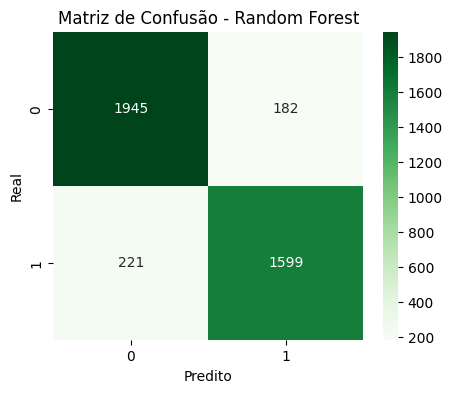

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "energydata_complete.csv"
df = pd.read_csv(file_path)

feature_cols = [col for col in df.columns if col.startswith("T") or col.startswith("RH") or col == "T_out"]
X = df[feature_cols].astype(float)
y = df["Appliances"].astype(float)

median_val = y.median()
y_bin = (y > median_val).astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_bin, test_size=0.2, random_state=42)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_log))

cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(5,4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Logistic Regression")
plt.show()

print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Random Forest")
plt.show()

In [ ]:
import pandas as pd

file_path_ihc = 'household_power_consumption.txt'

df_ihc = pd.read_csv(file_path_ihc, sep=';', na_values='?', low_memory=False)
df_ihc.head(10)

Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   
5  16/12/2006  17:29:00                3.520                  0.522   235.02   
6  16/12/2006  17:30:00                3.702                  0.520   235.09   
7  16/12/2006  17:31:00                3.700                  0.520   235.22   
8  16/12/2006  17:32:00                3.668                  0.510   233.99   
9  16/12/2006  17:33:00                3.662                  0.510   233.86   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  
5              15.0             0.0             2.0            17.0  
6              15.8             0.0             1.0            17.0  
7              15.8             0.0             1.0            17.0  
8              15.8             0.0             1.0            17.0  
9              15.8             0.0             2.0            16.0

In [ ]:
sample_1pct = df_ihc.sample(frac=0.01, random_state=42)
sample_1pct.head()

Date      Time  Global_active_power  Global_reactive_power  \
1870606   7/7/2010  18:10:00                0.256                  0.106   
213926   14/5/2007  06:50:00                0.466                  0.352   
409006   26/9/2007  18:10:00                0.758                  0.194   
265806   19/6/2007  07:30:00                1.290                  0.046   
1786279  10/5/2010  04:43:00                0.428                  0.202   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
1870606   242.00               1.2             0.0             0.0   
213926    237.22               2.4             0.0             2.0   
409006    238.66               3.2             0.0             1.0   
265806    240.64               5.4             1.0             0.0   
1786279   242.23               1.8             0.0             2.0   

         Sub_metering_3  
1870606             1.0  
213926              0.0  
409006              0.0  
265806             18.0  
1786279             1.0

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df_ihc['Global_active_power'].dropna(), bins=50)
plt.title('Distribuição de Global_active_power')
plt.xlabel('Global_active_power')
plt.ylabel('Frequência')
plt.show()

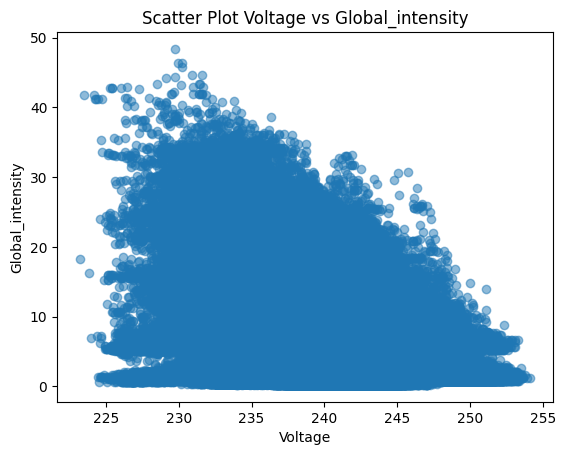

In [ ]:
plt.scatter(df_ihc['Voltage'], df_ihc['Global_intensity'], alpha=0.5)
plt.xlabel('Voltage')
plt.ylabel('Global_intensity')
plt.title('Scatter Plot Voltage vs Global_intensity')
plt.show()

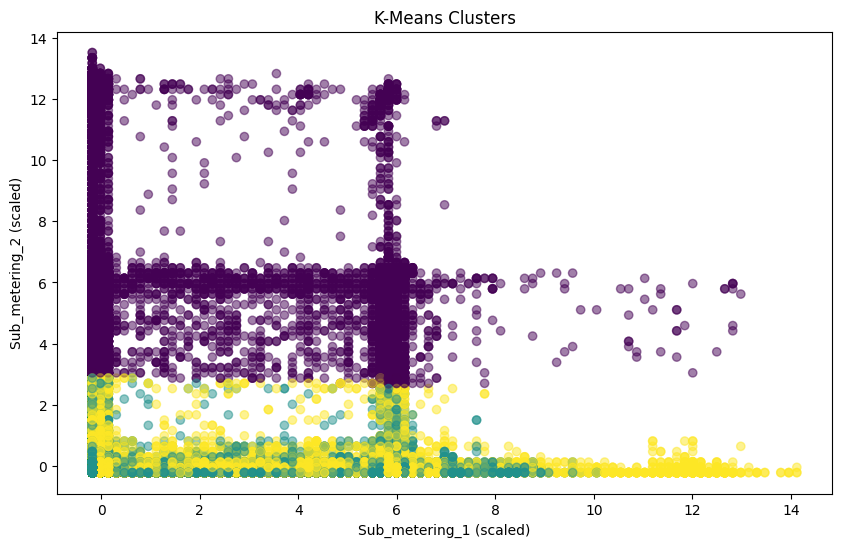

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = ['Sub_metering_1','Sub_metering_2','Sub_metering_3']
X = df_ihc[features].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df_ihc['Cluster'] = pd.Series(clusters, index=X.index)

plt.figure(figsize=(10,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('Sub_metering_1 (scaled)')
plt.ylabel('Sub_metering_2 (scaled)')
plt.title('K-Means Clusters')
plt.show()